##Leon Zhou

## Assignment

### Problem 1

Now suppose the interval $[0,1]$ divided into $N+1$ evenly spaced states:
$$0, \frac{1}{N}, \frac{2}{N}, \dots, \frac{N}{N}=1$$

Suppose that $N$ is quite large, e.g., $N=1000$.
For the desired steady-state distribution, we will use the very simple function $f(x)=x$. Note that this again gives the relative frequencies, not the probabilities. 

Define a proposal transition in a manner similar to what we did above. 
Specifically:
* If $j=0$, then propose $i=0$ or $i=\frac{1}{N}$ with equal probability.
* If $j=1$, then propose $i=1$ or $i=\frac{N-1}{N}$ with equal probability.
* Otherwise, propose $i = j \pm \frac{1}{N}$ with equal probability.

Don't set up a huge transition matrix $T$. Instead, use an agent to move around the states for a large number of time steps.

Set this up and run an agent-based simulation.
Use a small $N$ until you get the simulation working, then use $N = 1000$ or more.
Let the agent run around the states for a while (100,000 or more steps). 
Keep track of where the agent goes. 
Do you see the steady-state distribution emerge in the samples? 

### Problem 2

Change the interval to $(-1,1)$ and chop it up into $N$ evenly spaced points (states). To define the steady-state distribution, use frequencies given by
$$f(x) = e^{-20x^2}$$
Generate at least 100,000 steps of an agent trail and keep track of the results. 
What is the steady-state distribution?
What does the histogram look like?

### Handing in your work

Submit your solutions (code and histograms) to the MCMC assignment on Moodle.
You should submit a PDF output of your Colab notebook.

Please delete the examples and discussion prior to the assignment from the file that you turn in.
This is an assignment, not a project, so it is not necessary to provide a lot of discussion about your answers.

This assignment is due on **Wednesday, May 1**.

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import pylab

##Problem 1

In [0]:
n1 = 1000  # number of states

# function to return the relative frequency of state i
def f(x):
  return x+1

# function to simulate one move
def doMoveN(currState):
  # select the proposed transition state
  if currState == 0: 
    propState = random.choice([0, 1])
  elif currState == n1:
    propState = random.choice([1, (n1-1)])
  else:
    propState = random.choice([currState + 1, currState - 1])

  # now decide whether or not to move to the proposed state
  currFreq = f(currState)
  propFreq = f(propState)
  if(currFreq <= propFreq):  # then move
    currState = propState
  else:
    rho = propFreq/currFreq
    rand = random.random()
    doMove = (rand < rho) # True with probability rho; False with probability 1 - rho
    if doMove:
      currState = propState
    # else: nothing to do

  return currState

In [0]:
doMoveN(100)

101

Do a lot of steps

In [0]:
numSteps = 100000
visited1 = np.zeros(n1+1) # counts the number of times each state is visited
currState1 = 1
for i in range(numSteps):
  visited1[currState1] += 1
  currState1 = doMoveN(currState1)


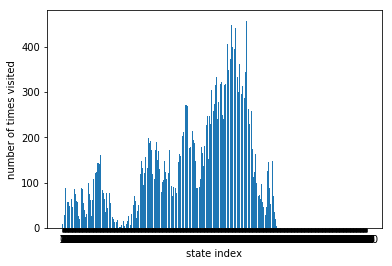

In [0]:
plt.bar(range(n1+1), visited1)
plt.xticks(range(n1+1), range(n1+1))
plt.xlabel("state index")
plt.ylabel("number of times visited");

Each time I run the code above, it seems like the graph would look different. When n is very small such as 4, there seem to exist an steady-state distribution, but when n is very large such as 1000, each time it runs, the distribution of each state visited seems to be different.

##Problem 2 

In [0]:
n = 1000  # number of states

# function to return the relative frequency of state i
def fN(i):
  fc = -20*(i**2)
  return math.exp(fc)

# function to simulate one move
def doMoveN1(currState):
  # select the proposed transition state
  if currState == 0:
    propState = random.choice([0, 1])
  elif currState == n-1:
    propState = random.choice([currState - 1, currState])
  else:
    propState = random.choice([currState + 1, currState - 1])

  # now decide whether or not to move to the proposed state
  currFreq = fN(currState)
  propFreq = fN(propState)
  if(currFreq <= propFreq):  # then move
    currState = propState
  else:
    rho = propFreq/currFreq
    rand = random.choice([-1,1])
    doMove = (rand < rho) # True with probability rho; False with probability 1 - rho
    if doMove:
      currState = propState
    # else: nothing to do

  return currState

In [0]:
doMoveN1(10)

11

In [0]:
numSteps = 100000
visitedN1 = np.zeros(n) # counts the number of times each state is visited
currState = 1
for i in range(numSteps):
  visitedN1[currState] += 1
  currState = doMoveN1(currState)

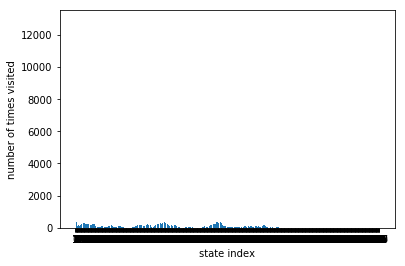

In [0]:
plt.bar(range(n), visitedN1)
plt.xticks(range(n), range(n))

plt.xlabel("state index")
plt.ylabel("number of times visited");

Each time I run the code above, the histogram would look different from each other. Thus, it does not appear to be a steady-state distribution. 